 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_csv_path = Path("resources/whale_returns.csv")
algo_csv_path = Path("resources/algo_returns.csv")
sp_tsx_path = Path("resources/sp_tsx_history.csv")
whale_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(ascending = True, inplace = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

In [79]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [7]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(ascending = True, inplace = True)

In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
#algo_df["Algo 2"] = algo_df["Algo 2"].fillna("unknown")

In [11]:
algo_df = algo_df.dropna()

In [12]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [13]:
algo_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df = pd.read_csv(sp_tsx_path,index_col="Date", parse_dates=True, infer_datetime_format=True)


In [15]:
sp_tsx_df.sort_index(ascending = True, inplace = True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [16]:
# Check Data Types
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [17]:
sp_tsx_df["Close"].drop_duplicates().copy()

Date
2012-10-01    $12,370.19
2012-10-02    $12,391.23
2012-10-03    $12,359.47
2012-10-04    $12,447.68
2012-10-05    $12,418.99
                 ...    
2019-12-20    $17,118.44
2019-12-23    $17,128.71
2019-12-24    $17,180.15
2019-12-27    $17,168.21
2019-12-30    $17,098.56
Name: Close, Length: 1814, dtype: object

In [18]:
sp_tsx_df.dtypes

Close    object
dtype: object

In [19]:
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace("$", "")
sp_tsx_df['Close']

/var/folders/lq/f254zmcs6wdb9qcpc4g368ch0000gn/T/ipykernel_18047/3243966148.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace("$", "")


Date
2012-10-01    12,370.19
2012-10-02    12,391.23
2012-10-03    12,359.47
2012-10-04    12,447.68
2012-10-05    12,418.99
                ...    
2019-12-20    17,118.44
2019-12-23    17,128.71
2019-12-24    17,180.15
2019-12-27    17,168.21
2019-12-30    17,098.56
Name: Close, Length: 1818, dtype: object

In [20]:
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',','')
sp_tsx_df['Close']

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [21]:
# Fix Data Types
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
sp_tsx_df["Close"]

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64

In [22]:
sp_tsx_df["Close"].describe()

count     1818.000000
mean     14678.202233
std       1328.337613
min      11811.380000
25%      13621.362500
50%      14923.545000
75%      15629.085000
max      17180.150000
Name: Close, dtype: float64

In [23]:
# Calculate Daily Returns
daily_returns_sp_tsx = sp_tsx_df.pct_change()
daily_returns_sp_tsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [24]:
# Drop nulls
daily_returns_sp_tsx = daily_returns_sp_tsx.dropna().copy()

In [25]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp_tsx.columns = ["S&P TSX"]

In [30]:
daily_returns_sp_tsx.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [27]:
daily_returns_sp_tsx.to_csv("resources/cleaned_daily_returns_sp_tsx.csv", index=False)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [31]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
pdr_df = pd.concat([whale_df, algo_df, daily_returns_sp_tsx], axis="columns", join="inner")
pdr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [32]:
pdr_df.sort_index(inplace=True)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

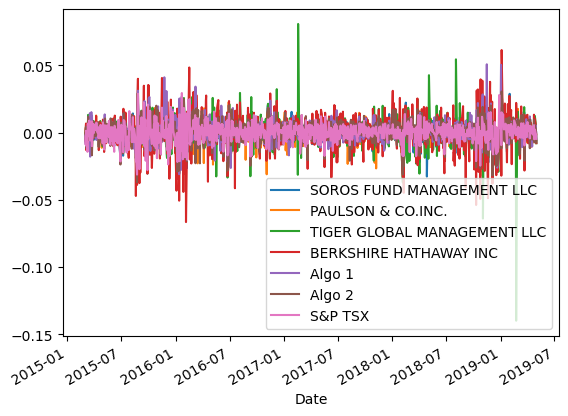

In [33]:
# Plot daily returns of all portfolios
pdr_df.plot()

#### Calculate and Plot cumulative returns.

In [34]:
# Calculate cumulative returns of all portfolios
pdr_cum_df = (1 + pdr_df).cumprod()
pdr_cum_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<Axes: xlabel='Date'>

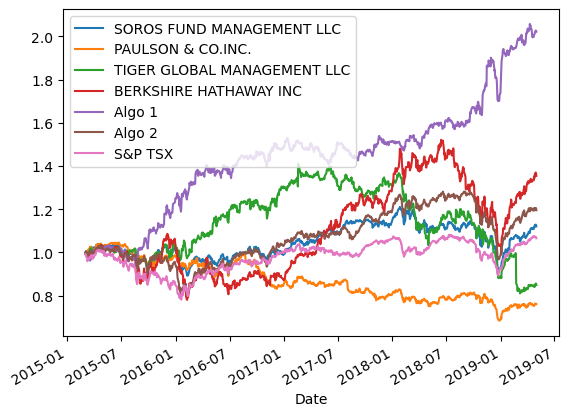

In [35]:
# Plot cumulative returns
pdr_cum_df.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

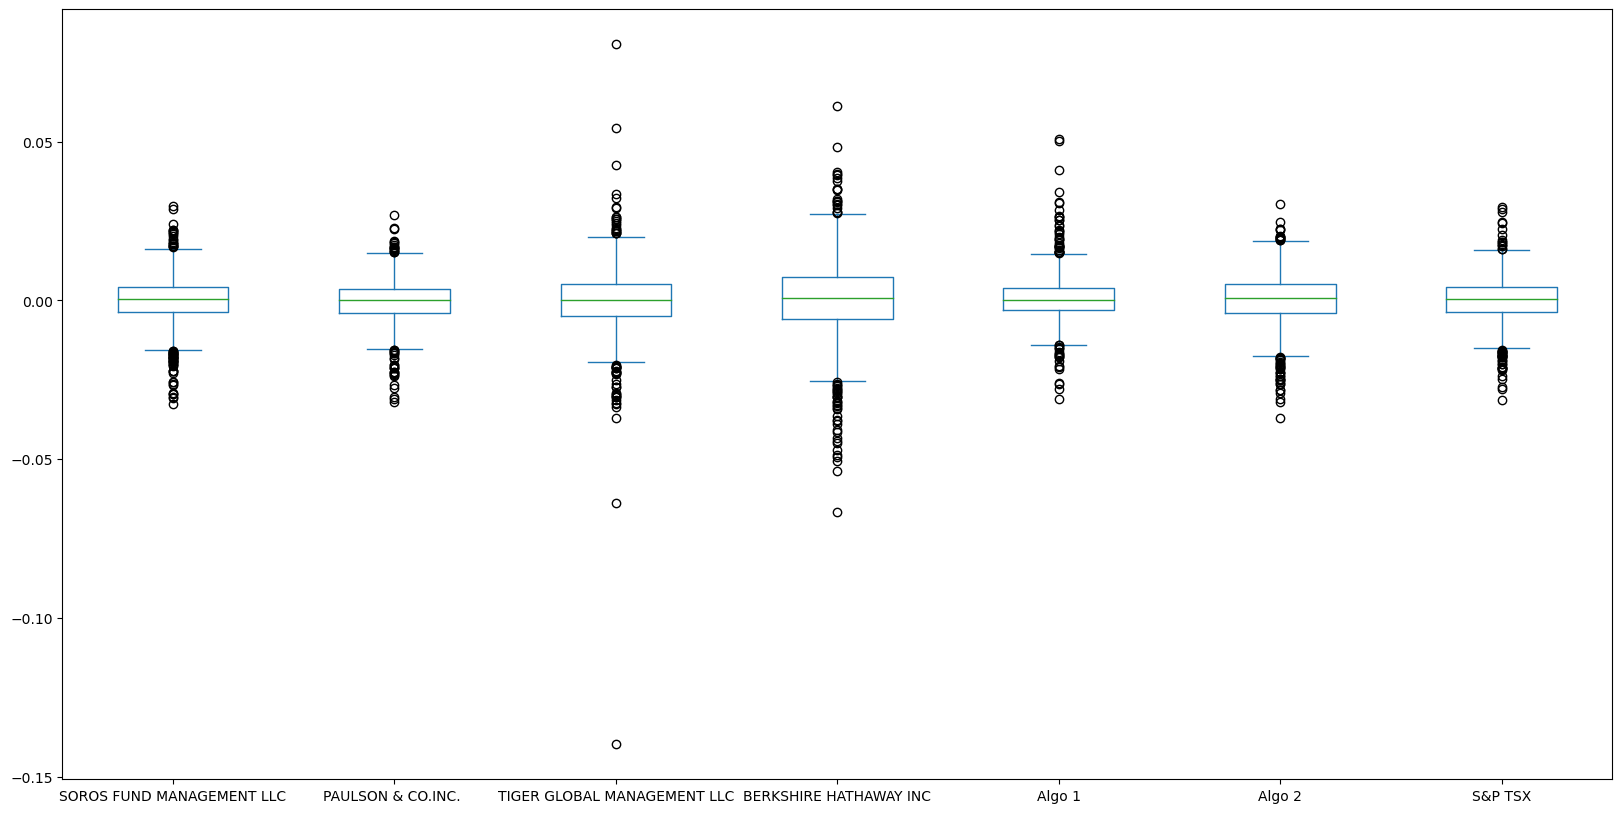

In [36]:
pdr_df.plot(kind = "box", figsize=(20,10))

### Calculate Standard Deviations

In [37]:
# Calculate the daily standard deviations of all portfolios
# Calculate  the daily standard deviation of S&P TSX 60
pdr_df_std = pd.DataFrame(pdr_df.std()).rename(columns = {0:"std"})
pdr_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [38]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = pdr_df_std[pdr_df_std["std"] > pdr_df_std.loc["S&P TSX", "std"]]
higher_std
        

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = pdr_df_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

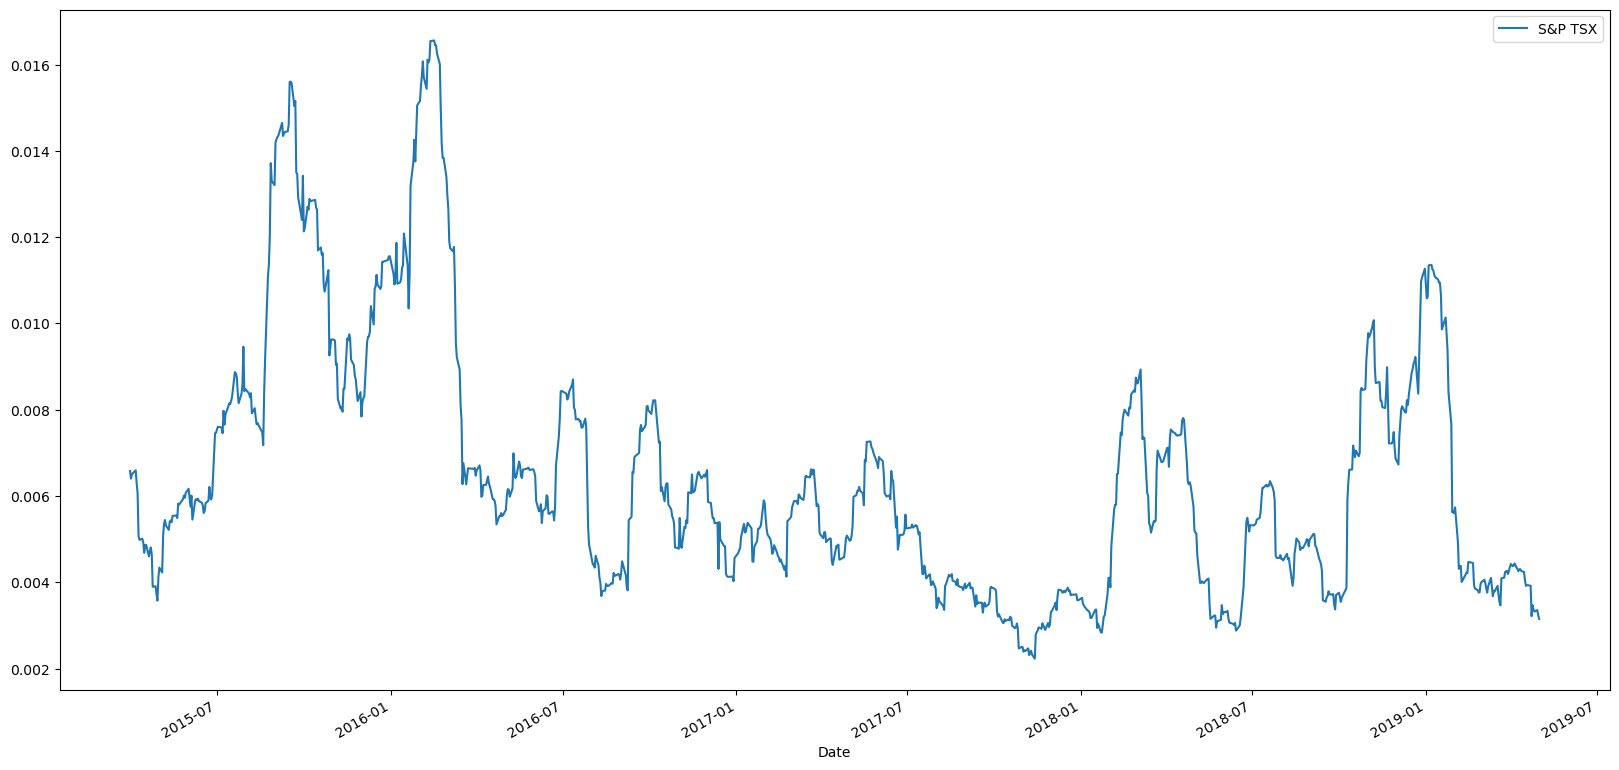

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp_rolling_21 = pdr_df[["S&P TSX"]].rolling(window = 21).std()

# Plot the rolling standard deviation
sp_rolling_21.plot(figsize = (20,10))


### Calculate and plot the correlation

In [41]:
# Calculate the correlation
correlation_df = pdr_df.corr()
correlation_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [42]:
# Display de correlation matrix
import seaborn as sns

<Axes: >

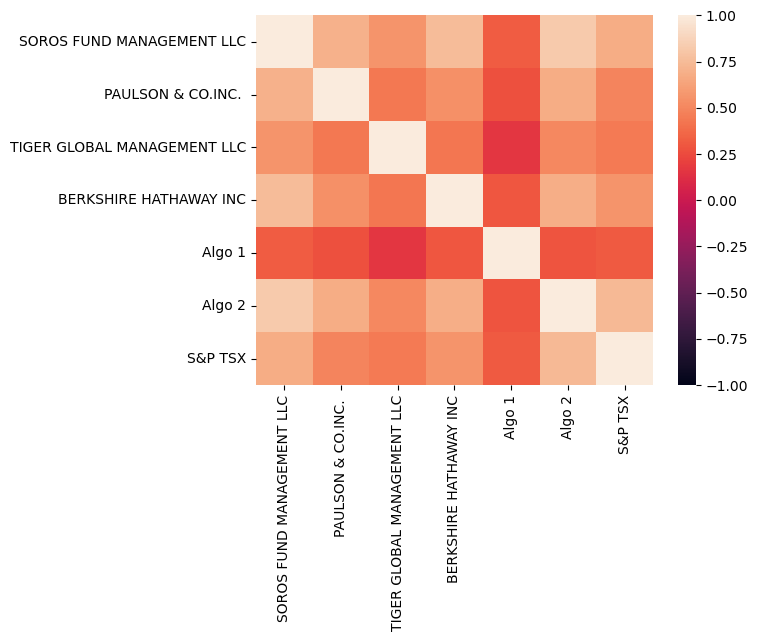

In [43]:
sns.heatmap(correlation_df, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [44]:
# Calculate covariance of a single portfolio
co_var_port = pdr_df.cov()
co_var_port



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,0.000061,0.000038,0.000048,0.000075,0.000019,0.000054,0.000037
PAULSON & CO.INC.,0.000038,0.000049,0.000033,0.000048,0.000014,0.000039,0.000024
TIGER GLOBAL MANAGEMENT LLC,0.000048,0.000033,0.000118,0.000059,0.000013,0.000046,0.000034
BERKSHIRE HATHAWAY INC,0.000075,0.000048,0.000059,0.000164,0.000028,0.000073,0.000050
Algo 1,0.000019,0.000014,0.000013,0.000028,0.000058,0.000018,0.000017
Algo 2,0.000054,0.000039,0.000046,0.000073,0.000018,0.000069,0.000043
S&P TSX,0.000037,0.000024,0.000034,0.000050,0.000017,0.000043,0.000049


In [45]:
covariance_soros = pdr_df["SOROS FUND MANAGEMENT LLC"].cov(pdr_df['S&P TSX'])
covariance_soros

3.710689907855224e-05

In [46]:
covariance_tiger = pdr_df["TIGER GLOBAL MANAGEMENT LLC"].cov(pdr_df['S&P TSX'])
covariance_tiger

3.372724149435498e-05

In [47]:
covariance_hatha = pdr_df["BERKSHIRE HATHAWAY INC"].cov(pdr_df['S&P TSX'])
covariance_hatha

5.027336077110013e-05

In [48]:
#covariance_paul = pdr_df["PAULSON & CO.INC."].cov(pdr_df['S&P TSX'])
#covariance_paul

In [49]:
covariance_algo1 = pdr_df["Algo 1"].cov(pdr_df['S&P TSX'])
covariance_algo1

1.656300030891138e-05

In [50]:
covariance_algo2 = pdr_df["Algo 2"].cov(pdr_df['S&P TSX'])
covariance_algo2

4.318704430084258e-05

In [51]:
# Calculate variance of S&P TSX
var_sp = pdr_df['S&P TSX'].var()
var_sp
# Computing beta
beta_hatha = covariance_hatha / var_sp
beta_hatha

1.0160439091063613

<Axes: title={'center': 'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

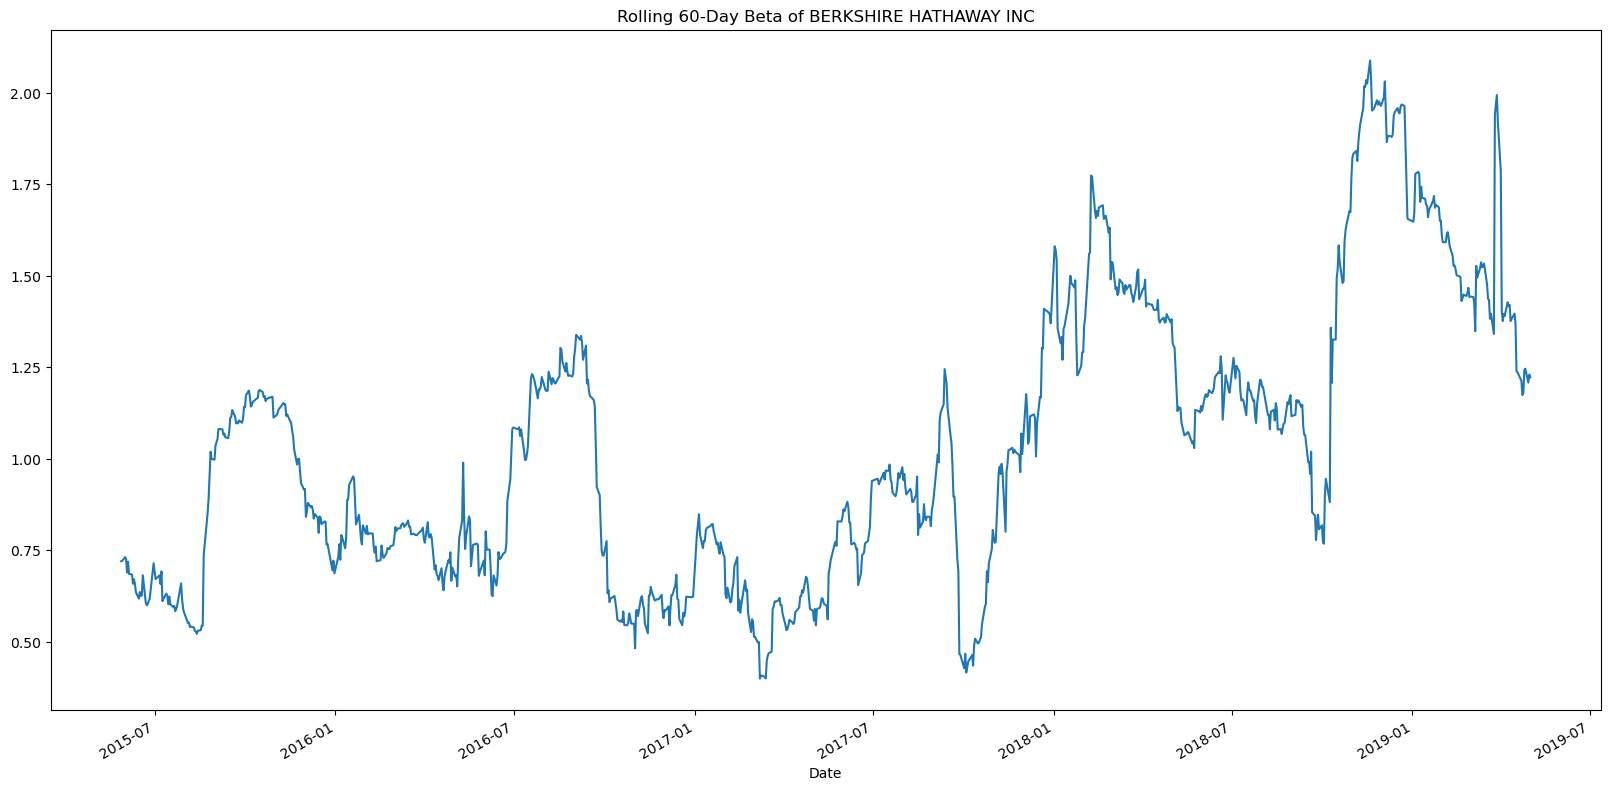

In [52]:
#Plot a beta trend
rolling_covariance = pdr_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(pdr_df['S&P TSX'])
rolling_variance = pdr_df['S&P TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

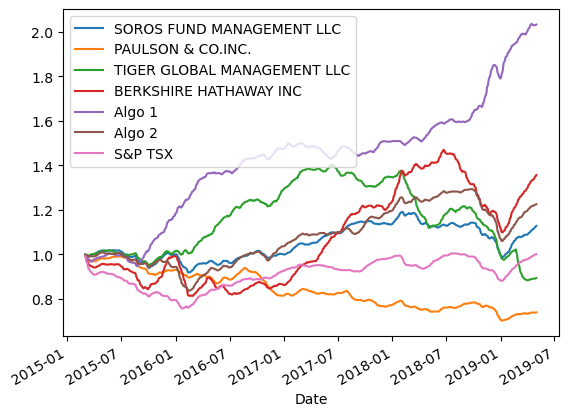

In [53]:
# Use `ewm` to calculate the rolling window
pdr_df_ewm = pdr_df.ewm(span = 21,adjust = False).mean()
(1+pdr_df_ewm).cumprod().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios
sharpe_ratios = pdr_df.mean()*252/(pdr_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

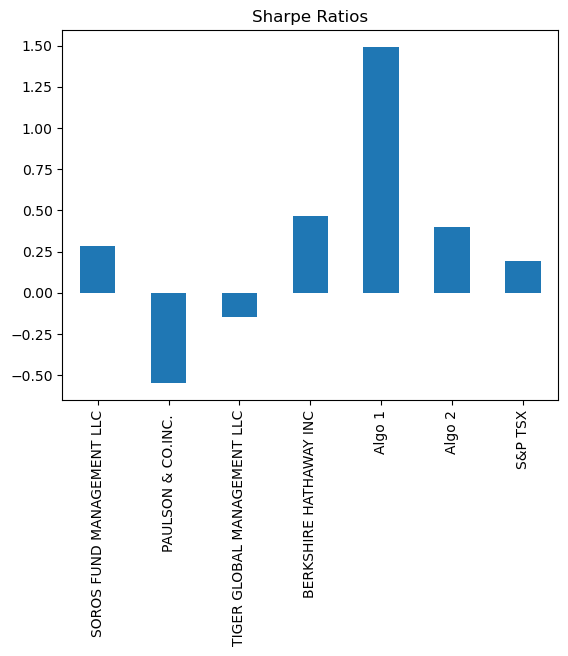

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperforms both the market and the whales portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [56]:
# Reading data from 1st stock
goog_path = Path("resources/Goog2.csv")
goog_df = pd.read_csv(goog_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog_df.head()

,GOOG
Date,
2018-04-30,78.31
2018-05-01,79.11
2018-05-02,78.48
2018-05-03,78.60
2018-05-04,79.05


In [57]:
# Reading data from 2nd stock
aapl_path = Path("resources/AAPL2.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df.head()

,AAPL
Date,
2018-04-30,41.32
2018-05-01,42.28
2018-05-02,44.14
2018-05-03,44.22
2018-05-04,45.96


In [58]:
# Reading data from 3rd stock
amzn_path = Path("resources/AMZN2.csv")
amzn_df = pd.read_csv(amzn_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
amzn_df.head()

,AMZN
Date,
2018-04-30,78.31
2018-05-01,79.11
2018-05-02,78.48
2018-05-03,78.60
2018-05-04,79.05


In [59]:
# Combine all stocks in a single DataFrame
my_port_df = pd.concat((goog_df, aapl_df, amzn_df), axis = 1, join= "inner")
my_port_df.sort_index(ascending = True, inplace = True)
my_port_df.head()

,GOOG,AAPL,AMZN
Date,,,
2018-04-30,78.31,41.32,78.31
2018-05-01,79.11,42.28,79.11
2018-05-02,78.48,44.14,78.48
2018-05-03,78.60,44.22,78.60
2018-05-04,79.05,45.96,79.05


In [60]:
# Reset Date index
my_port_df.index
my_port_df.head()

,GOOG,AAPL,AMZN
Date,,,
2018-04-30,78.31,41.32,78.31
2018-05-01,79.11,42.28,79.11
2018-05-02,78.48,44.14,78.48
2018-05-03,78.60,44.22,78.60
2018-05-04,79.05,45.96,79.05


In [61]:
# Reorganize portfolio data by having a column per symbol


In [62]:
# Calculate daily returns
daily_returns = my_port_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,GOOG,AAPL,AMZN
Date,,,
2018-05-01,0.010216,0.023233,0.010216
2018-05-02,-0.007964,0.043992,-0.007964
2018-05-03,0.001529,0.001812,0.001529
2018-05-04,0.005725,0.039349,0.005725
2018-05-07,0.012144,0.007180,0.012144


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [63]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-05-01    0.014555
2018-05-02    0.009355
2018-05-03    0.001624
2018-05-04    0.016933
2018-05-07    0.010490
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Join your returns DataFrame to the original returns DataFrame
new_portfolio_returns = pd.concat((portfolio_returns,pdr_df), axis = 1, join = "inner")
new_portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
new_portfolio_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-05-01,0.014555,0.008046,0.001157,-0.006231,0.005326,0.001589,0.002106,0.000708
2018-05-02,0.009355,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,0.000576
2018-05-03,0.001624,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.000413
2018-05-04,0.016933,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.006909
2018-05-07,0.010490,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.005037


In [65]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [66]:
new_portfolio_std = pd.DataFrame(new_portfolio_returns.std()).rename(columns = {0:"std"})
new_portfolio_std

,std
my_portfolio,0.018643
SOROS FUND MANAGEMENT LLC,0.008764
PAULSON & CO.INC.,0.007142
TIGER GLOBAL MANAGEMENT LLC,0.014520
BERKSHIRE HATHAWAY INC,0.014792
Algo 1,0.008170
Algo 2,0.008443
S&P TSX,0.006144


In [67]:
# Calculate the annualized `std`

new_annualized_std = new_portfolio_std*np.sqrt(252)
new_annualized_std

,std
my_portfolio,0.295956
SOROS FUND MANAGEMENT LLC,0.139130
PAULSON & CO.INC.,0.113375
TIGER GLOBAL MANAGEMENT LLC,0.230499
BERKSHIRE HATHAWAY INC,0.234821
Algo 1,0.129688
Algo 2,0.134027
S&P TSX,0.097531


### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

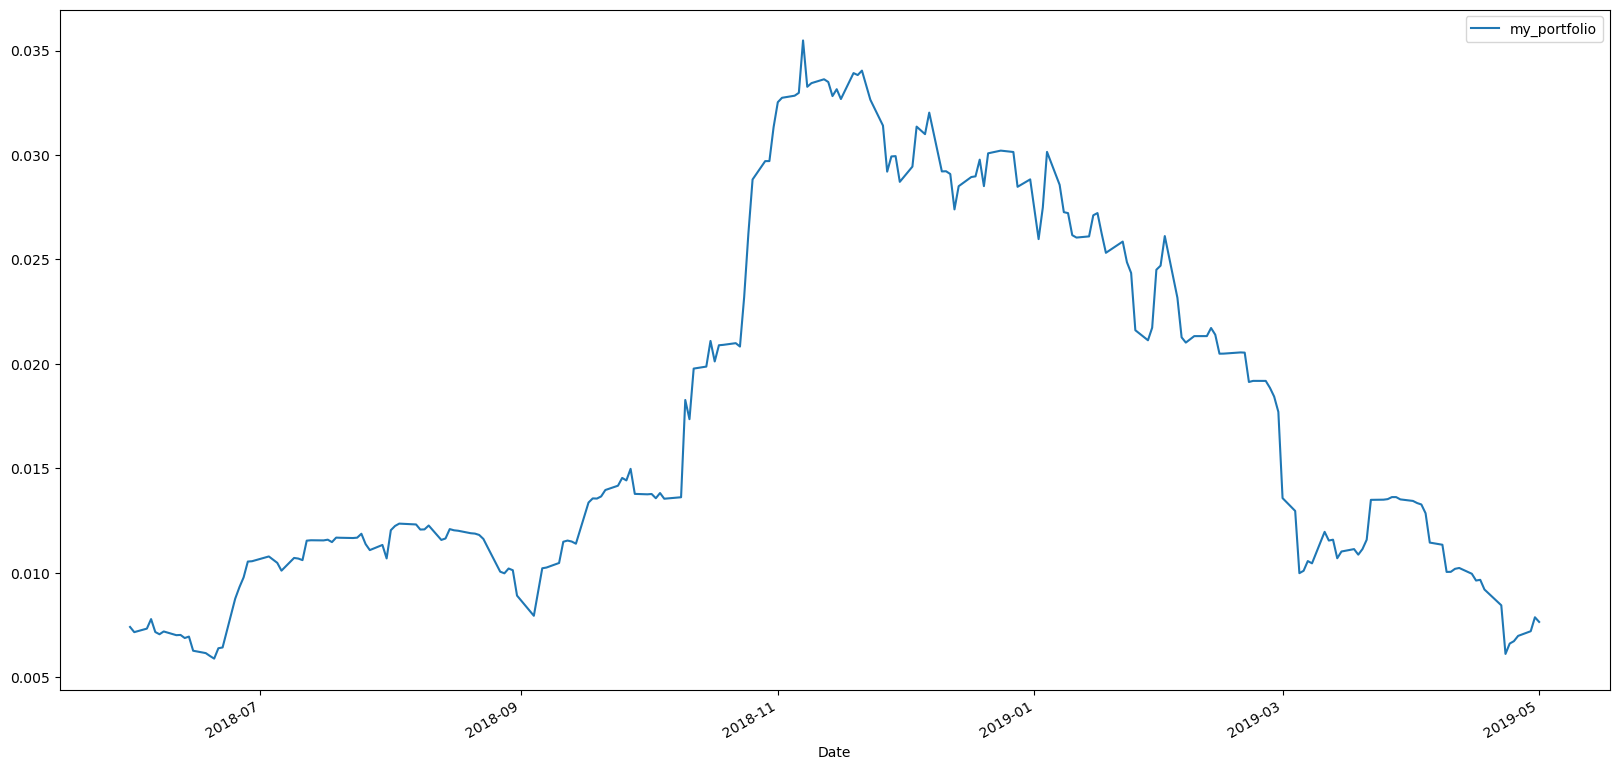

In [68]:
# Calculate rolling standard deviation
port_rolling_21 = new_portfolio_returns[["my_portfolio"]].rolling(window = 21).std()

# Plot the rolling standard deviation
port_rolling_21.plot(figsize = (20,10))


### Calculate and plot the correlation

In [69]:
# Calculate and plot the ccorrelation_df = pdr_df.corr()
correlation_df = new_portfolio_returns.corr()


In [70]:
import seaborn as sns

<Axes: >

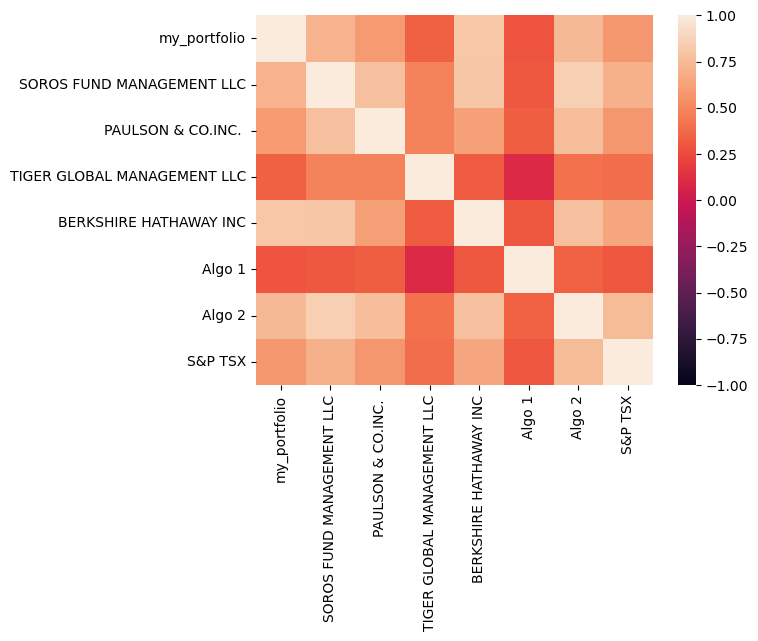

In [71]:
sns.heatmap(correlation_df, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [72]:
# Calculate and plot Beta
co_var_port = new_portfolio_returns.cov()
covariance_myport = new_portfolio_returns["my_portfolio"].cov(new_portfolio_returns['S&P TSX'])
covariance_myport

6.59559220871382e-05

In [73]:
var_sp_new = new_portfolio_returns['S&P TSX'].var()
var_sp_new
# Computing beta
beta_myport = covariance_myport / var_sp_new
beta_myport


1.747309757833929

In [74]:
beta_port = co_var_port / var_sp_new



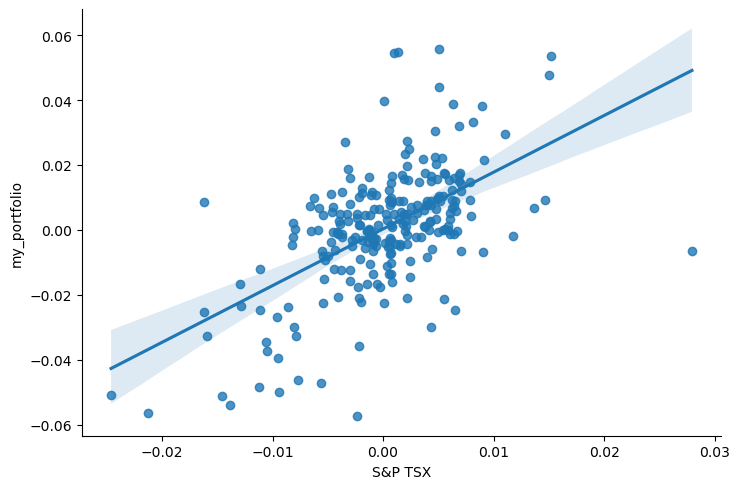

In [75]:
import seaborn as sns

sns.lmplot(x="S&P TSX", y="my_portfolio", data=new_portfolio_returns, aspect=1.5, fit_reg=True)

<Axes: title={'center': 'Rolling 21-Day Beta of my portfolio'}, xlabel='Date'>

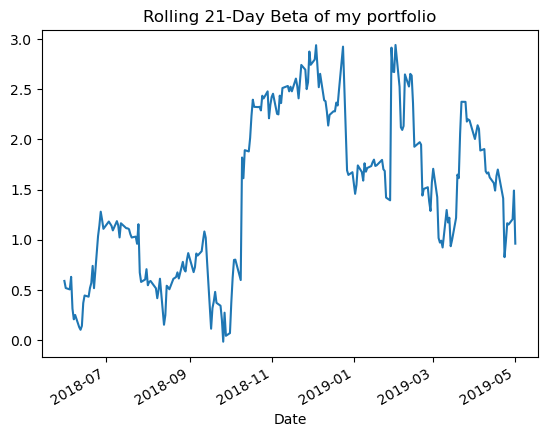

In [76]:
rolling_covariance = new_portfolio_returns['my_portfolio'].rolling(window=21).cov(new_portfolio_returns['S&P TSX'])
rolling_variance = new_portfolio_returns['S&P TSX'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title='Rolling 21-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [77]:
# Calculate Annualized Sharpe Ratios
port_sharpe_ratios = new_portfolio_returns.mean()*252/(new_portfolio_returns.std()*np.sqrt(252))
port_sharpe_ratios

my_portfolio                   0.566011
SOROS FUND MANAGEMENT LLC      0.219777
PAULSON & CO.INC.             -0.016765
TIGER GLOBAL MANAGEMENT LLC   -0.863484
BERKSHIRE HATHAWAY INC        -0.055428
Algo 1                         2.158723
Algo 2                        -0.041888
S&P TSX                        0.529668
dtype: float64

<Axes: title={'center': 'sharpe ratios'}>

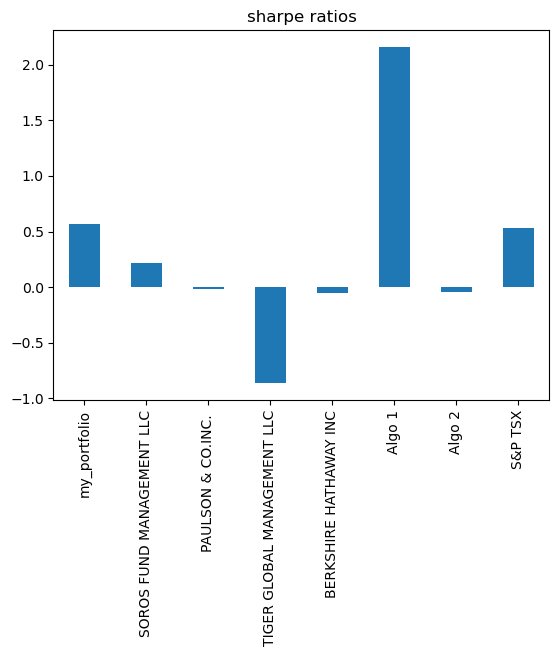

In [78]:
# Visualize the sharpe ratios as a bar plot
port_sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

My portfolio slightly outperforms the markey (S&P TSX),but my portfolio's riskier than other portfoilos as the result of the annaulized standard deviation and beta claculaion outputs.
Moreover, my portfolio has the most correlation to the BERKSHINE HATHAWAY INC and the S&P TSX, respectively.